In [114]:
import json
import numpy as np
import pandas as pd
from preprocess import MediumBlogPost

import seaborn.apionly as sns
import matplotlib.pyplot as plt
%matplotlib inline


file_path = '/Users/Kevin/Downloads/data-science.jl'

/Users/Kevin/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## load data

In [5]:
dfs = []
with open(file_path) as f:
    for line in f:
        row = MediumBlogPost(**json.loads(line)).to_frame()
        dfs.append(row)
df = pd.concat(dfs).reset_index(drop=True)

In [22]:
df.tail(3)

,title,publish_time,author,url,author_url,headings,contents,mins_read,claps,lang,tags
8624,How I Mined Tweets to Learn More about A Zambi...,2018-08-24,Mbuyu Makayi,https://medium.com/developer-circles-lusaka/ho...,https://medium.com/@Mr_Makayi,How I Mined Tweets to Learn More about A Zambi...,"A few months back, I decided to tap into some ...",5,106,en,"[Data Science, Analytics, Twitter, Data Visual..."
8625,Reset – Carissa Yao – Medium,2018-08-24,Carissa Yao,https://medium.com/@carijyao/reset-44c190974b4,https://medium.com/@carijyao,Reset,I t’s my first day running for 3+ miles withou...,5,1,en,"[Running, Challenge, Learning, Injury, Data Sc..."
8626,XML and Scala – Technology@Nineleaps – Medium,2018-08-24,joydeep bhattacharjee,https://medium.com/technology-nineleaps/xml-an...,https://medium.com/@joydeepubuntu,XML and Scala Conquer XML land with Scala,As data scientists and machine learning engine...,6,2,en,"[Spark, Scala, Xml, Data Science, Technology]"


## Basic EDA

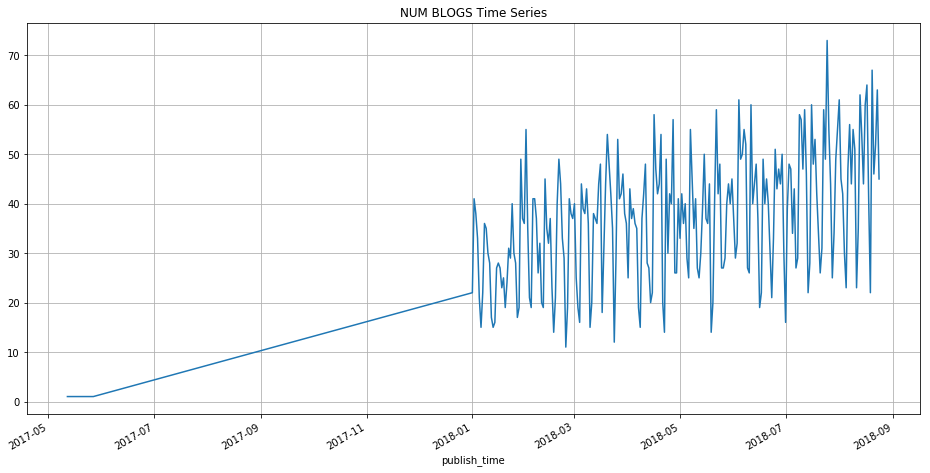

In [159]:
df.groupby('publish_time')['contents'].count().plot(
    figsize=(16, 8),
    title='NUM BLOGS Time Series',
    grid=True
)

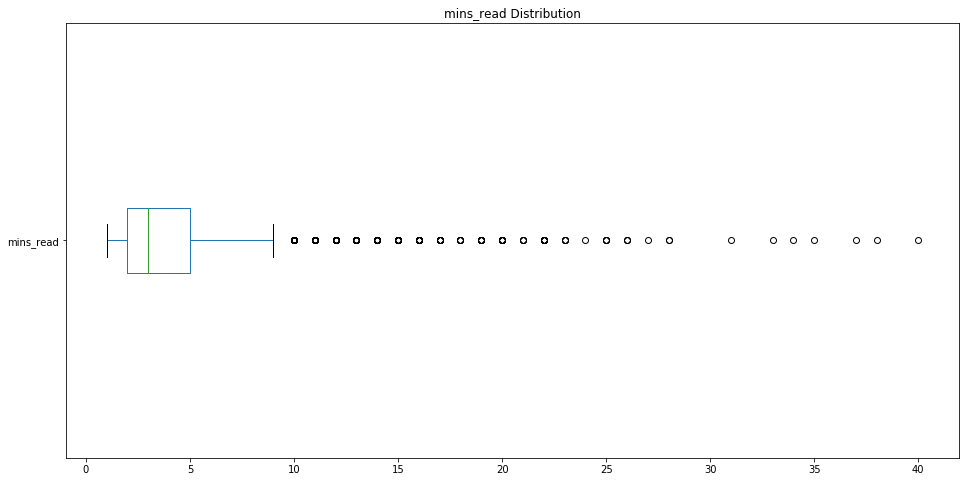

In [158]:
df['mins_read'].plot(
    kind='box',
    figsize=(16, 8),
    title='mins_read Distribution',
    vert=False
)

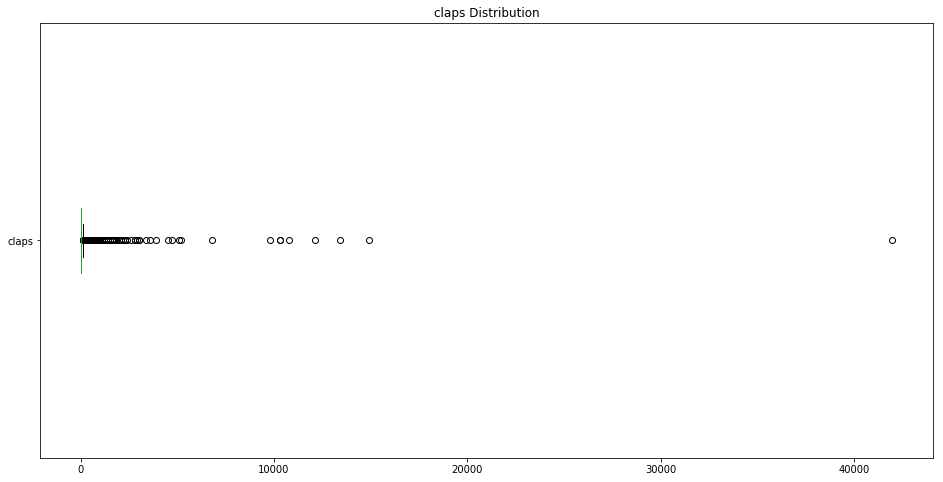

In [157]:
df[df.claps < 1e6]['claps'].plot(
    kind='box',
    figsize=(16, 8),
    title='claps Distribution',
    vert=False
)

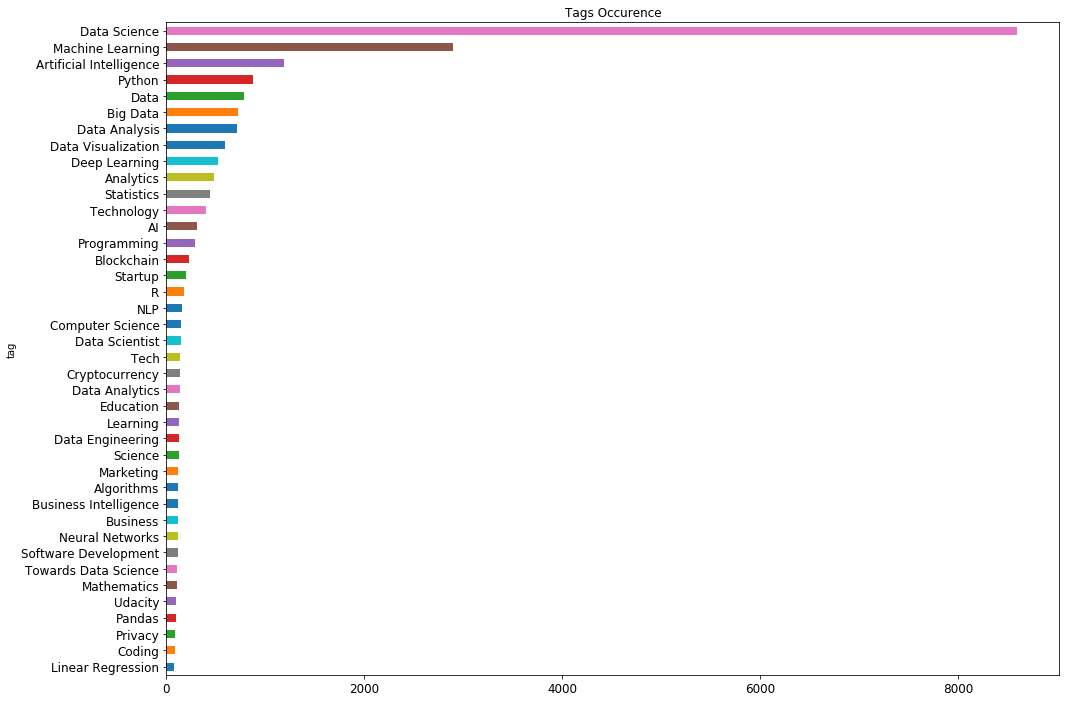

In [156]:
import itertools
tags = list(itertools.chain(*df.tags.values))
pd.DataFrame(tags, columns=['tag'])\
    .groupby('tag')['tag']\
    .count()\
    .sort_values(ascending=False)[:40][::-1]\
    .plot(
        kind='barh',
        figsize=(16, 12),
        fontsize=12,
        title='Tags Occurence',
)

In [87]:
# import itertools

# tags = list(itertools.chain(*df.tags.values))
# df.groupby('publish_time')['tags'].apply(
#     lambda x: [(k, len(list(l))) for k, l in itertools.groupby(list(itertools.chain(*x.values)))])

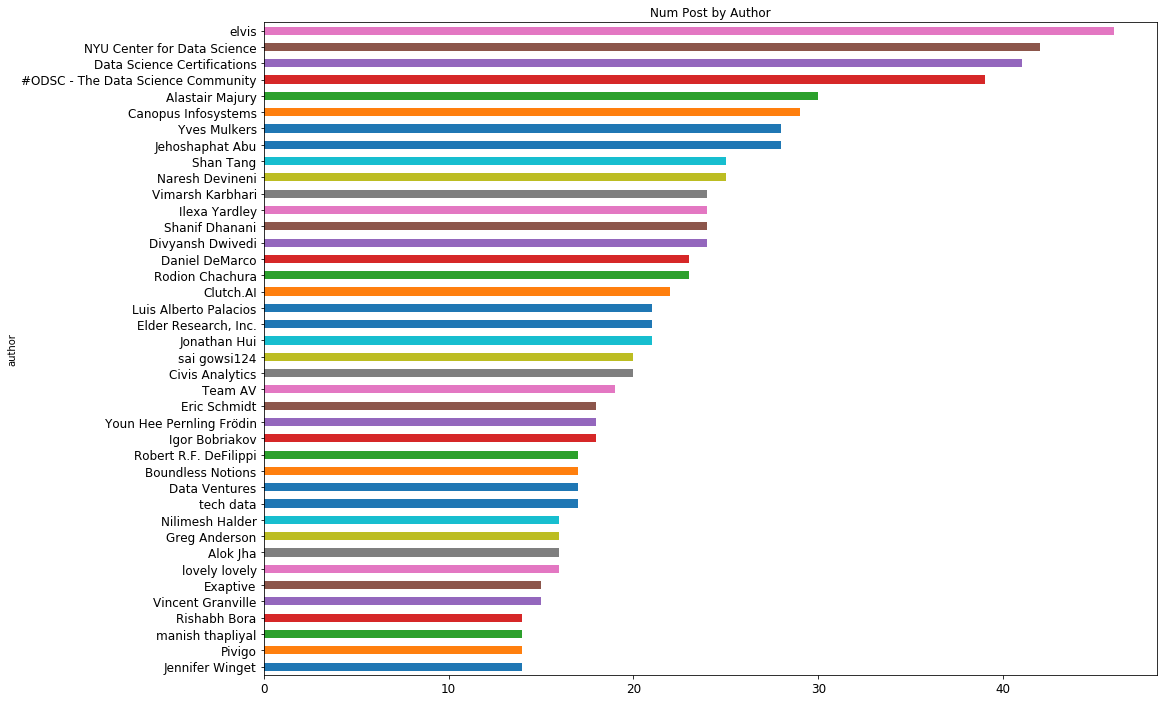

In [155]:
df.groupby('author')['author']\
    .count()\
    .sort_values(ascending=False)[:40][::-1]\
    .plot(
        kind='barh',
        figsize=(16, 12),
        fontsize=12,
        title='Num Post by Author',
)

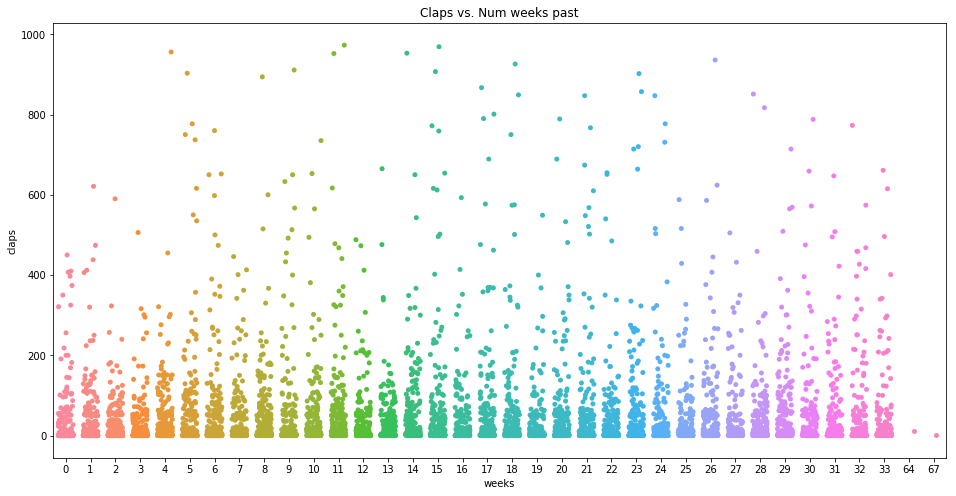

In [137]:
df['weeks'] = df.publish_time.apply(lambda x: int((df.publish_time.iloc[-1] - x) / np.timedelta64(1, 'W')))

data = df[df.claps < 1000]
f, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Claps vs. Num weeks past', fontsize=12)
sns.stripplot(x='weeks', y='claps', data=data, ax=ax, jitter=0.3)

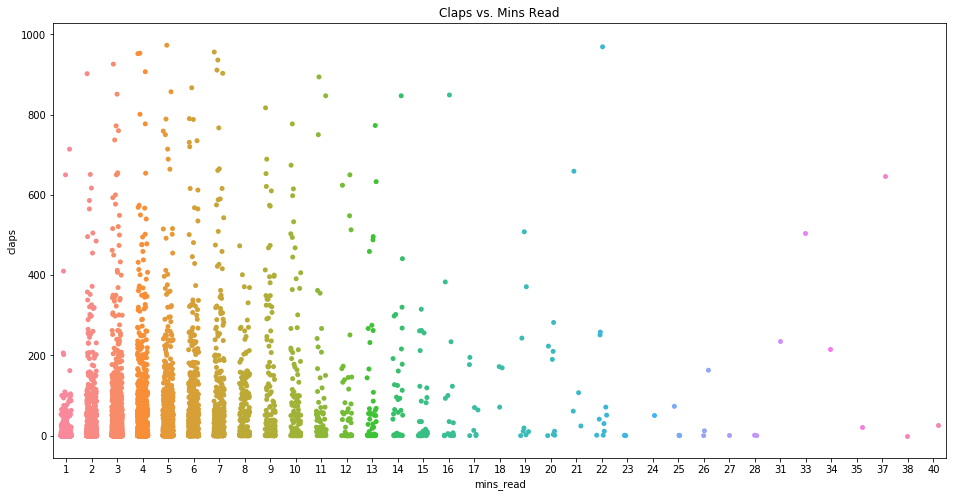

In [139]:
data = df[df.claps < 1000]
f, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Claps vs. Mins Read', fontsize=12)
sns.stripplot(x='mins_read', y='claps', data=data, ax=ax, jitter=0.2)

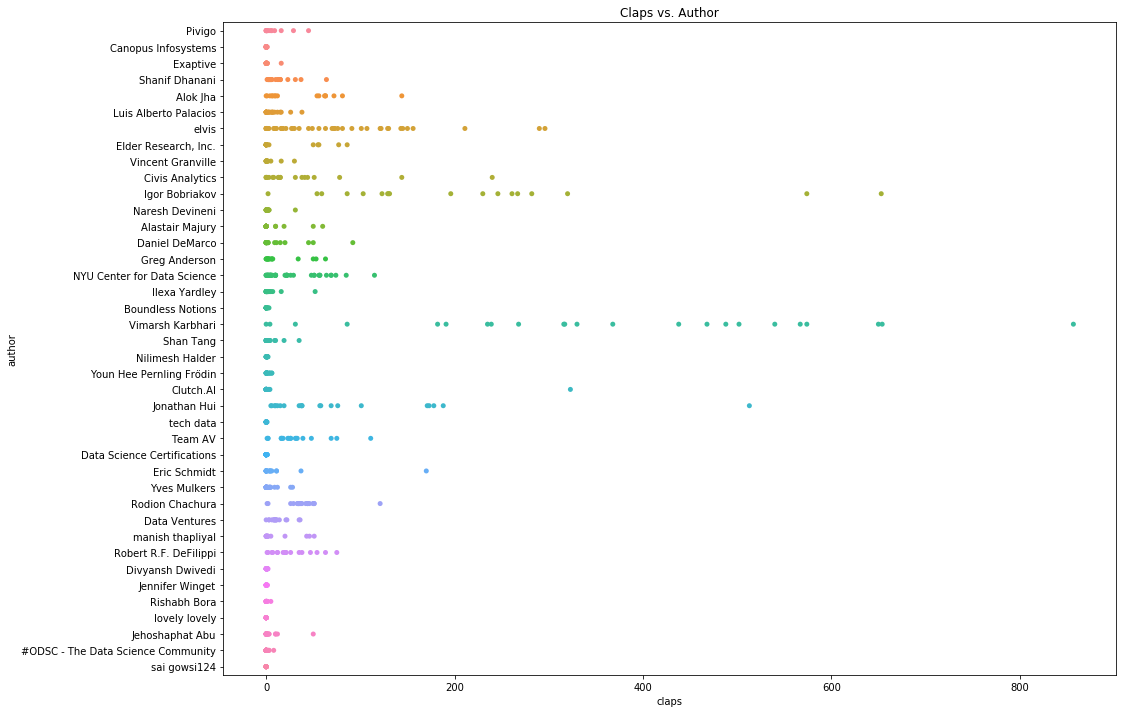

In [154]:
high_vol_author = df.groupby('author')['author']\
    .count()\
    .sort_values(ascending=False)[:40]\
    .index.values

high_vol_author_filter = df.author.isin(high_vol_author)

data = df[high_vol_author_filter.values]
data = data[data.claps < 1000]
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Claps vs. Author', fontsize=12)
sns.stripplot(x='claps', y='author', data=data, ax=ax)